In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler


In [3]:
df=pd.read_csv("cardiovascular_diseases.csv",sep = ';'  )

In [4]:
df.head(5) 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df.shape

(70000, 13)

## Data Pre-Processing

In [6]:
df=df.rename(columns = {'ap_hi': 'Systolic', 'ap_lo': 'Diastolic'}, inplace = False)

In [7]:
#drop in useful column that contains data it will not be used in data analysis 
df=df.drop('id', axis=1)

In [8]:
df.head(5) 

,age,gender,height,weight,Systolic,Diastolic,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
#Calculate the age by year
df['age']=round(df['age']/365.25)

In [10]:
df.head(5)

,age,gender,height,weight,Systolic,Diastolic,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
#Use the height and weight to calculate BMI(Body Mass Index)
df['bmi']=round((df['weight']/(df['height']/100)**2), 1)

In [12]:
df.head(5) 

,age,gender,height,weight,Systolic,Diastolic,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.0


In [13]:
column_names = ["age", "gender","height","weight","bmi","Systolic","Diastolic","bp_c","cholesterol","gluc","smoke",
               "alco","active","cardio"]

df = df.reindex(columns=column_names)

In [14]:
df.head(5)

,age,gender,height,weight,bmi,Systolic,Diastolic,bp_c,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,22.0,110,80,NaN,1,1,0,0,1,0
1,55.0,1,156,85.0,34.9,140,90,NaN,3,1,0,0,1,1
2,52.0,1,165,64.0,23.5,130,70,NaN,3,1,0,0,0,1
3,48.0,2,169,82.0,28.7,150,100,NaN,1,1,0,0,1,1
4,48.0,1,156,56.0,23.0,100,60,NaN,1,1,0,0,0,0


In [15]:
def blood_pressure_categories(x,y):
    if x<=80 and y<=60:
        return 'Hypotensive'
    elif x<=120 and y<=80:
        return 'Normal'
    elif x<=139 and y<=89:
        return 'Prehypertensive'
    elif x<=159 or y<=99:
        return 'Stage_1'
    elif x<=179 or y<=109:
        return "Stage_2"
    elif x>180 or y>110:
        return 'hypertensive_crisis'
    else:
        return None

In [16]:
df['bp_c']=df.apply(lambda x:blood_pressure_categories(x['Systolic'],x['Diastolic']),axis=1)


In [17]:
df.head(5)

,age,gender,height,weight,bmi,Systolic,Diastolic,bp_c,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,22.0,110,80,Normal,1,1,0,0,1,0
1,55.0,1,156,85.0,34.9,140,90,Stage_1,3,1,0,0,1,1
2,52.0,1,165,64.0,23.5,130,70,Prehypertensive,3,1,0,0,0,1
3,48.0,2,169,82.0,28.7,150,100,Stage_1,1,1,0,0,1,1
4,48.0,1,156,56.0,23.0,100,60,Normal,1,1,0,0,0,0


In [17]:
df.head(5)

,age,gender,height,weight,bmi,Systolic,Diastolic,bp_c,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,22.0,110,80,Normal,1,1,0,0,1,0
1,55.0,1,156,85.0,34.9,140,90,Stage_1,3,1,0,0,1,1
2,52.0,1,165,64.0,23.5,130,70,Prehypertensive,3,1,0,0,0,1
3,48.0,2,169,82.0,28.7,150,100,Stage_1,1,1,0,0,1,1
4,48.0,1,156,56.0,23.0,100,60,Normal,1,1,0,0,0,0


In [18]:
df.head(5)

,age,gender,height,weight,bmi,Systolic,Diastolic,bp_c,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,22.0,110,80,Normal,1,1,0,0,1,0
1,55.0,1,156,85.0,34.9,140,90,Stage_1,3,1,0,0,1,1
2,52.0,1,165,64.0,23.5,130,70,Prehypertensive,3,1,0,0,0,1
3,48.0,2,169,82.0,28.7,150,100,Stage_1,1,1,0,0,1,1
4,48.0,1,156,56.0,23.0,100,60,Normal,1,1,0,0,0,0


In [19]:
df_train,df_test=train_test_split(df, test_size=.2, random_state=199)

In [20]:
df_train[["gender","cardio"]].groupby(["gender"], as_index = False).mean().sort_values(by="cardio",ascending = False)

,gender,cardio
1,2,0.507402
0,1,0.495578


Male's cardiovascular disease rate is higher

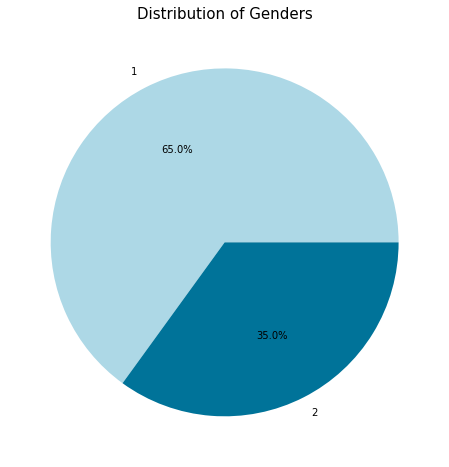

In [21]:
labels = df_train['gender'].value_counts().index
sizes = df_train['gender'].value_counts().values
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%' ,colors = ['#ADD8E6','#007399'])
plt.title("Distribution of Genders",color = 'black',fontsize = 15);

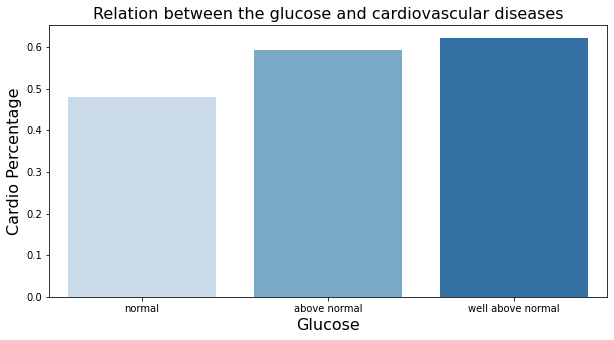

In [22]:
plt.figure(figsize = (10,5))
gluc_data = df_train.groupby('gluc').mean()
gluc=sns.barplot(data=gluc_data, x=gluc_data.index, y='cardio',palette='Blues')
gluc.set_xticklabels(['normal', 'above normal','well above normal'])
plt.title('Relation between the glucose and cardiovascular diseases', fontsize=16)
plt.xlabel("Glucose", fontsize=16)
plt.ylabel("Cardio Percentage", fontsize=16)
plt.savefig('glucose.png');

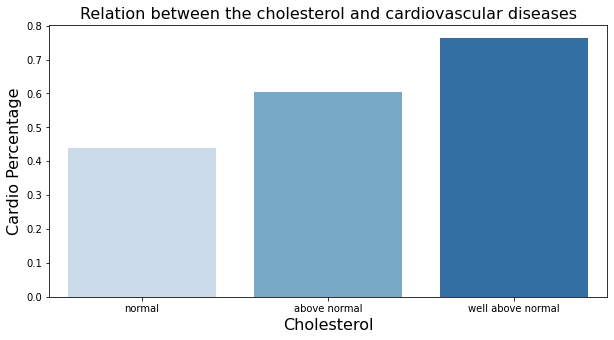

In [23]:
plt.figure(figsize = (10,5))
cholesterol_data = df_train.groupby('cholesterol').mean()
cholesterol=sns.barplot(data=cholesterol_data, x=cholesterol_data.index, y='cardio',palette='Blues')
cholesterol.set_xticklabels(['normal', 'above normal','well above normal'])
plt.title('Relation between the cholesterol and cardiovascular diseases', fontsize=16)
plt.xlabel("Cholesterol", fontsize=16)
plt.ylabel("Cardio Percentage", fontsize=16);

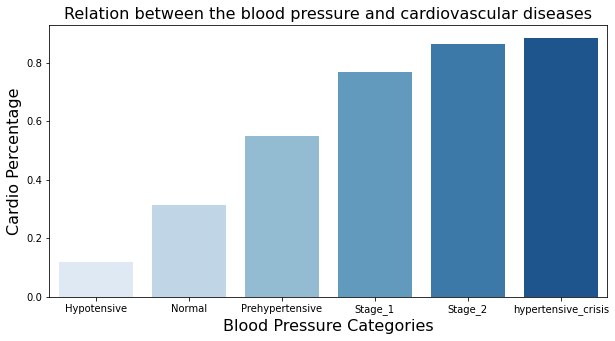

In [ ]:
plt.figure(figsize = (10,5))
bp_c_data=df_train.groupby(["bp_c"]).mean()
bp_c=sns.barplot(data=bp_c_data,x=bp_c_data.index,y='cardio',palette='Blues')
plt.title('Relation between the blood pressure and cardiovascular diseases', fontsize=16)
plt.xlabel("Blood Pressure Categories", fontsize=16)
plt.ylabel("Cardio Percentage", fontsize=16)
plt.savefig('B_P_C.png');

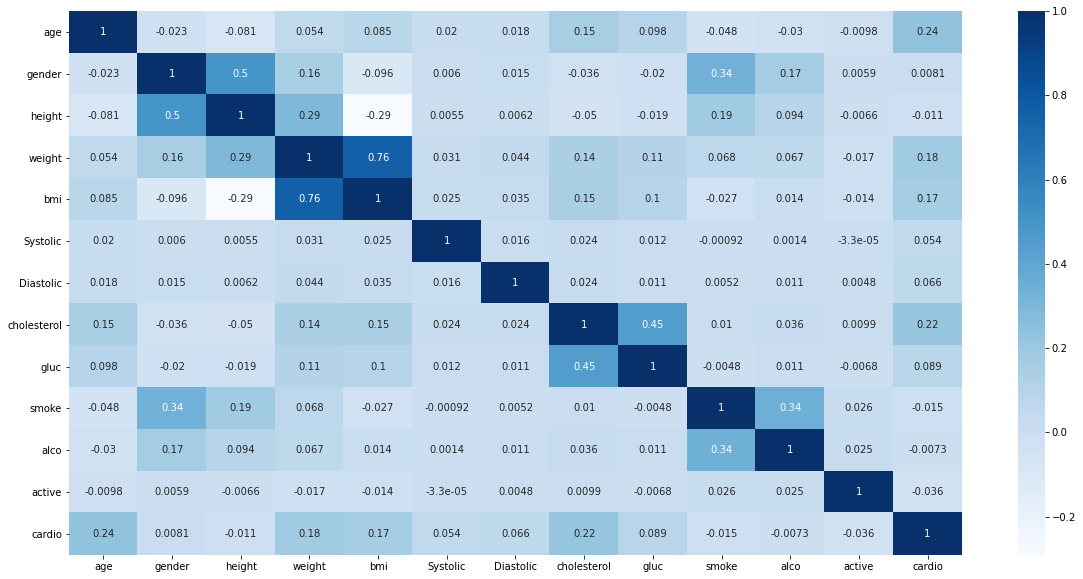

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap='Blues');

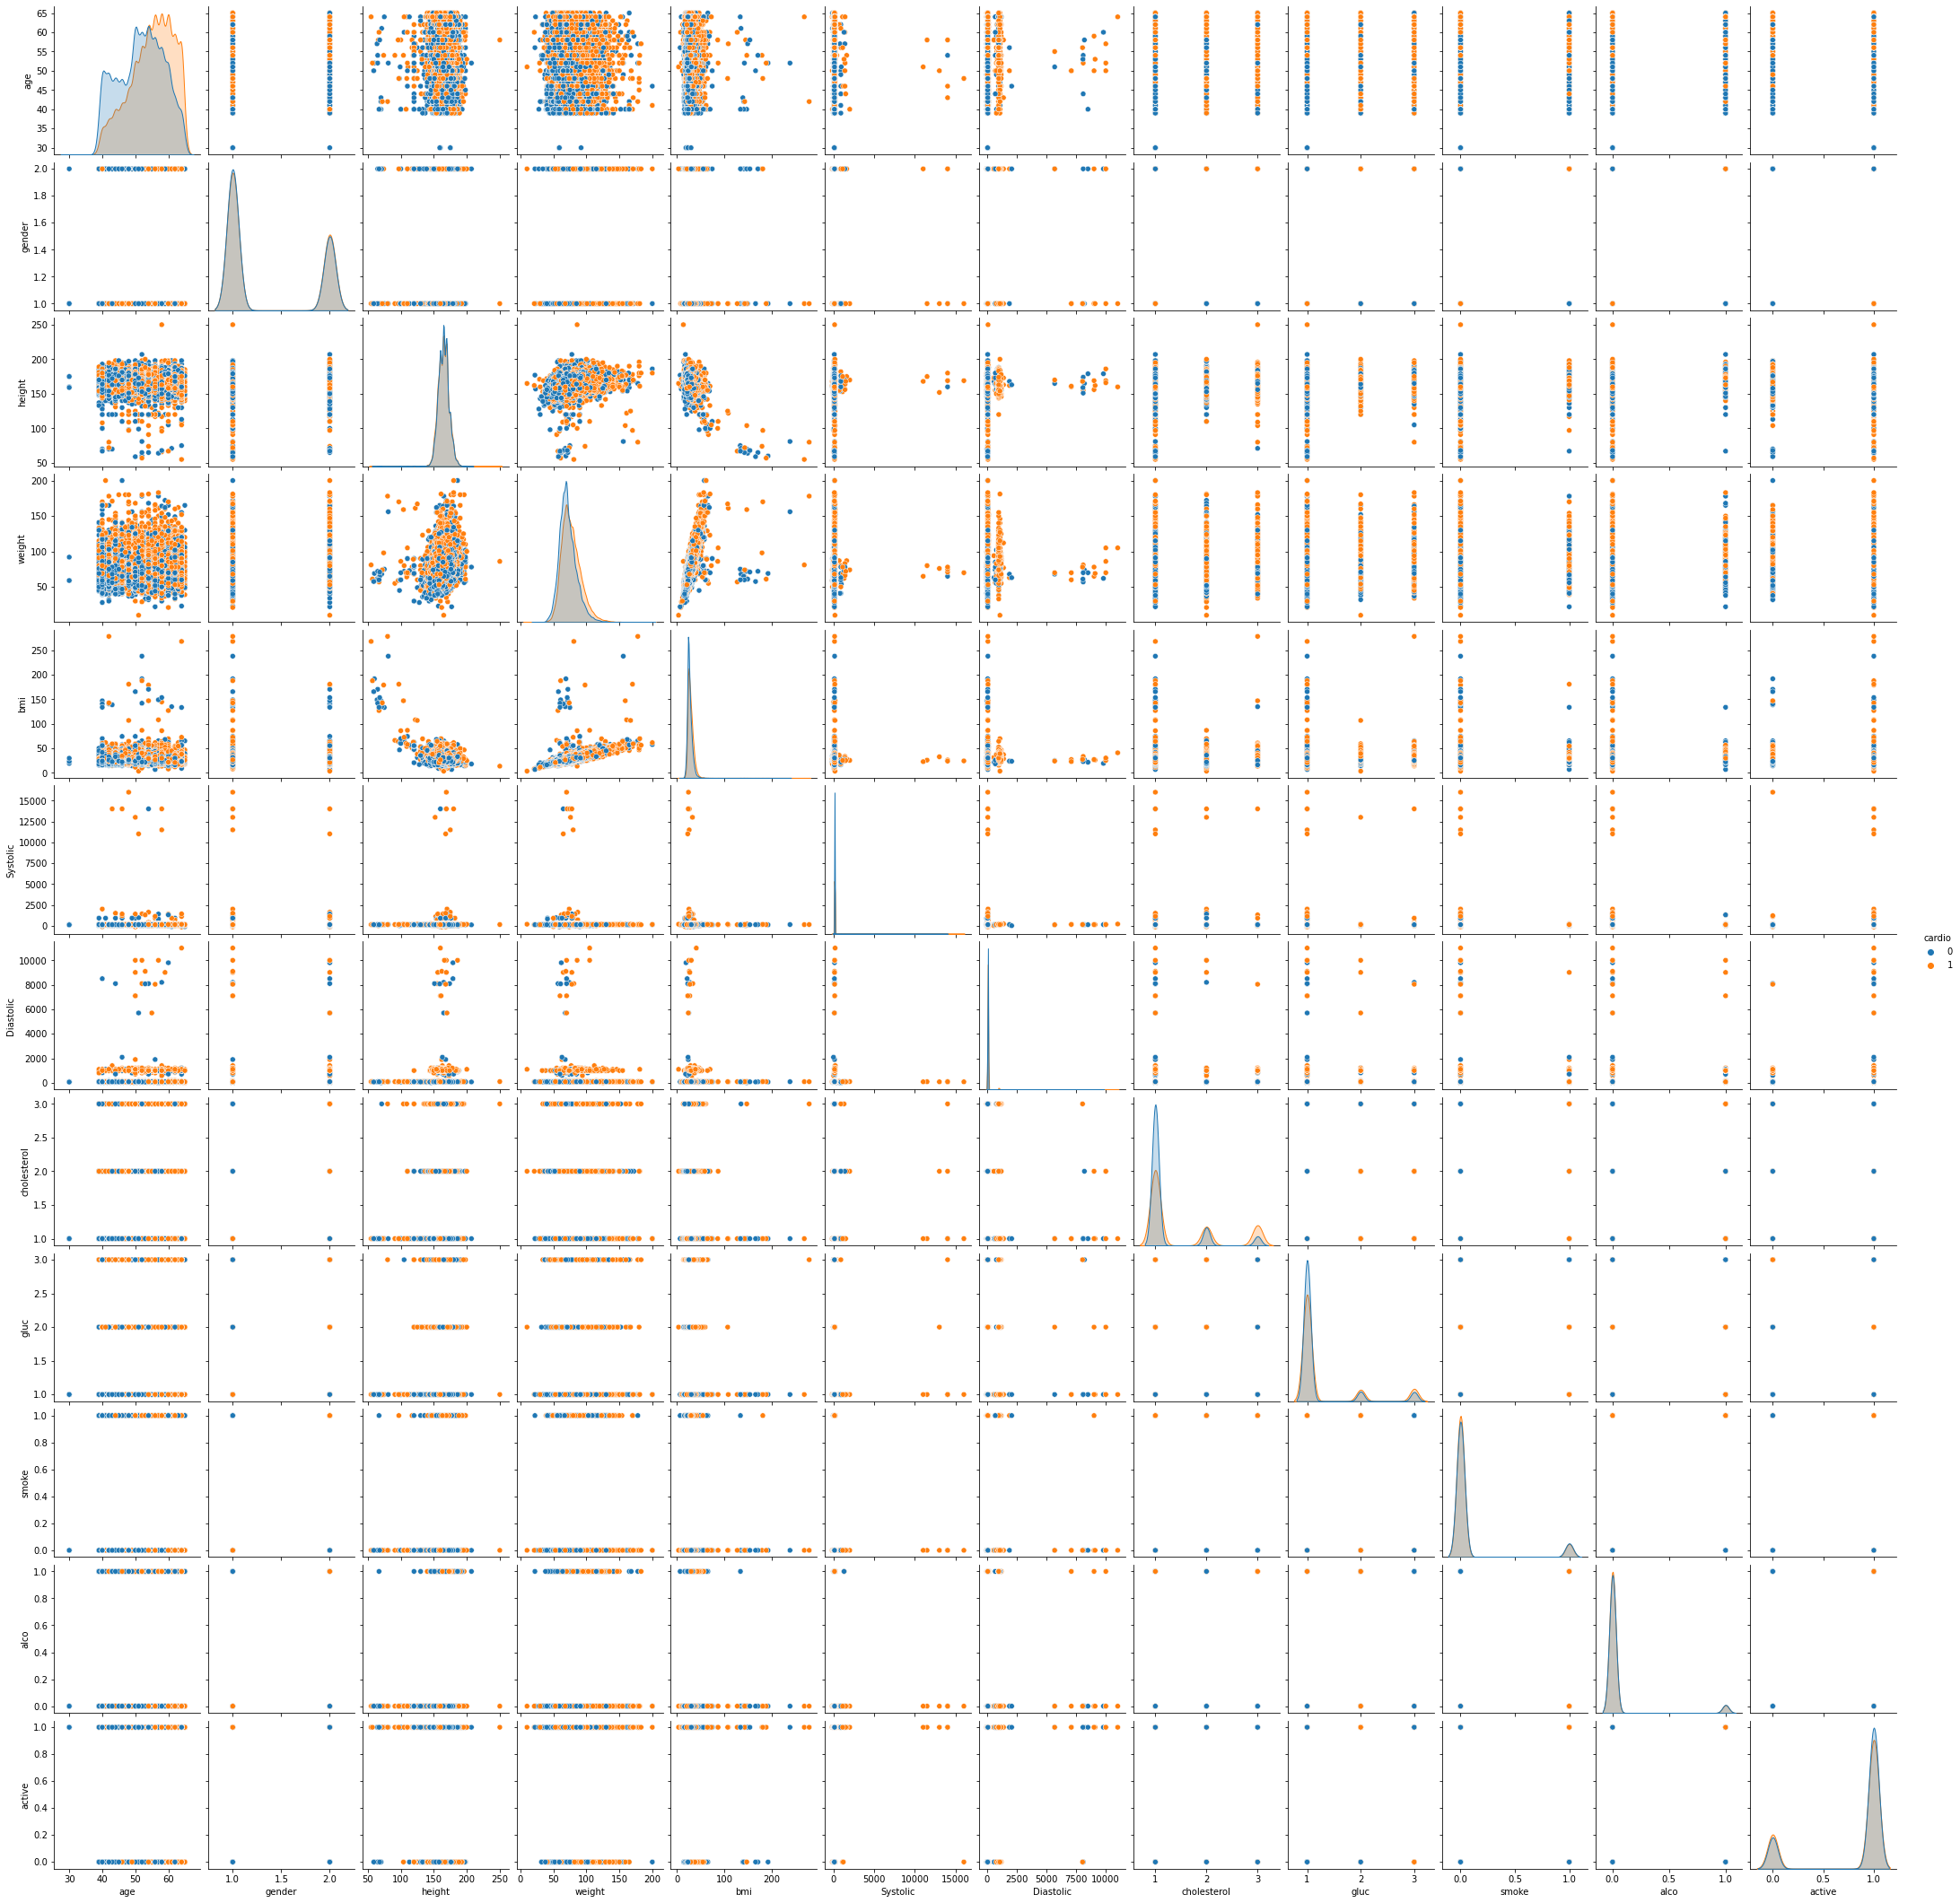

In [ ]:
sns.pairplot(df_train, hue='cardio');


In [101]:
X_train = df_train.loc[:,["age", "gender","height","weight","bmi","Systolic","Diastolic",
                          "cholesterol","gluc","smoke",
                        "alco","active"]]

y_train = df_train['cardio']

In [102]:
X_test = df_train.loc[:,["age", "gender","height","weight","bmi","Systolic","Diastolic",
                          "cholesterol","gluc","smoke",
                        "alco","active"]]

y_test = df_train['cardio']

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     28016
           1       0.81      0.79      0.80     27984

    accuracy                           0.80     56000
   macro avg       0.80      0.80      0.80     56000
weighted avg       0.80      0.80      0.80     56000





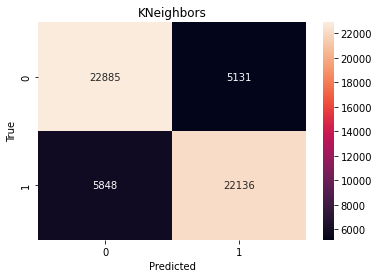

In [104]:
knn =KNeighborsClassifier()
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)
pram_dict = {"n_neighbors": range(1,5)}
gridsearch = GridSearchCV(knn, param_grid=pram_dict, cv=5)
gridsearch.fit(X_train_scaler, y_train)
predictions = gridsearch.predict(X_test_scaler)
gridsearch.best_params_
y_predKnn=gridsearch.predict(X_test_scaler)
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('KNeighbors');
plt.xlabel('Predicted');
plt.ylabel('True');

In [105]:
print("Accuracy : ",accuracy_score(y_test, y_predKnn))
print("Precision : ",precision_score (y_test, y_predKnn))
print("Recall : ",recall_score(y_test, y_predKnn))



Accuracy :  0.8039464285714286
Precision :  0.8118238163347636
Recall :  0.7910234419668382


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28016
           1       0.99      0.96      0.98     27984

    accuracy                           0.98     56000
   macro avg       0.98      0.98      0.98     56000
weighted avg       0.98      0.98      0.98     56000





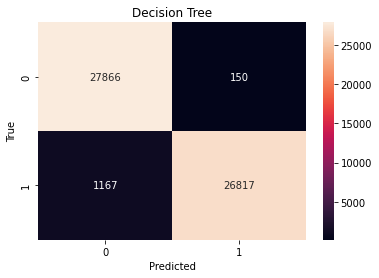

In [95]:
decision =DecisionTreeClassifier()
pram_dict1={"criterion":['gini','entropy']}
gridsearch = GridSearchCV(decision, param_grid=pram_dict1, cv=5)
gridsearch.fit(X_train, y_train)
predictions = gridsearch.predict(X_test)
gridsearch.best_params_
y_predDecision=gridsearch.predict(X_test)
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('Decision Tree');
plt.xlabel('Predicted');
plt.ylabel('True');

In [122]:
print("Accuracy : ",accuracy_score(y_test, y_predDecision))
print("precision : ",precision_score (y_test, y_predDecision))
print("recall : ",recall_score(y_test, y_predDecision))

Accuracy :  0.9764821428571429
precision :  0.9944376460117922
recall :  0.9582975986277873


              precision    recall  f1-score   support

           0       0.70      0.77      0.73     28016
           1       0.74      0.68      0.71     27984

    accuracy                           0.72     56000
   macro avg       0.72      0.72      0.72     56000
weighted avg       0.72      0.72      0.72     56000





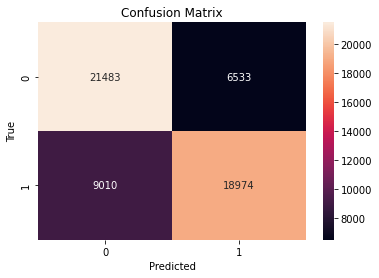

In [120]:
Logistic = LogisticRegression()
pram_dict1={"penalty":['l2'],"solver":['liblinear']}

gridsearch = GridSearchCV(Logistic, pram_dict1, cv = 5)
gridsearch.fit(X_train, y_train)
predictions = gridsearch.predict(X_test)
gridsearch.best_params_
y_predLogistic=gridsearch.predict(X_test)
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('True');

In [121]:
print("Accuracy : ",accuracy_score(y_test, y_predLogistic))
print("precision : ",precision_score (y_test, y_predLogistic))
print("recall : ",recall_score(y_test, y_predLogistic))

Accuracy :  0.7224464285714286
precision :  0.7438742306033638
recall :  0.678030303030303


              precision    recall  f1-score   support

           0       0.97      0.98      0.98     28016
           1       0.98      0.97      0.98     27984

    accuracy                           0.98     56000
   macro avg       0.98      0.98      0.98     56000
weighted avg       0.98      0.98      0.98     56000





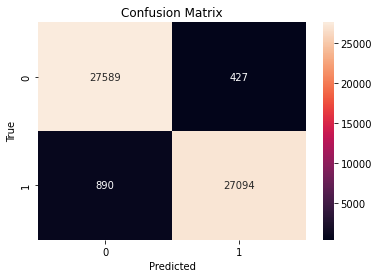

In [106]:
RandomForest = RandomForestClassifier()
max_features= ['sqrt']
n_estimators=[100]
bootstrap = [True]
random_state=[199]
param_grid=dict(n_estimators=n_estimators,max_features=max_features,bootstrap=bootstrap,random_state=random_state )
gridsearch = GridSearchCV(RandomForest,param_grid,cv = 5)
gridsearch.fit(X_train, y_train)
predictions = gridsearch.predict(X_test)

gridsearch.best_params_
y_predRandom=gridsearch.predict(X_test)
#Reporta
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('True');

In [107]:
print("Accuracy : ",accuracy_score(y_test, y_predRandom))
print("Pccuracy : ",precision_score (y_test, y_predRandom))
print("Recall : ",recall_score(y_test, y_predRandom))


Accuracy :  0.9764821428571429
Pccuracy :  0.9844845754151376
Recall :  0.9681961120640366


              precision    recall  f1-score   support

           0       0.72      0.79      0.75     28016
           1       0.77      0.69      0.72     27984

    accuracy                           0.74     56000
   macro avg       0.74      0.74      0.74     56000
weighted avg       0.74      0.74      0.74     56000





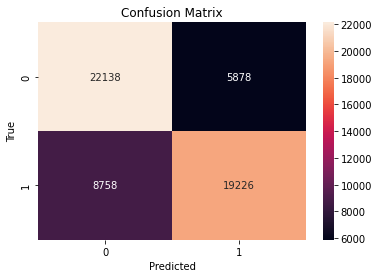

In [123]:
XGB = XGBClassifier()
n_estimators= range(6, 10)
max_depth=range(3, 8)
learning_rate=[.2, .3, .4]
colsample_bytree= [.7, .8, .9, 1]
parameters=dict(n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate, colsample_bytree=colsample_bytree)
gridsearch = GridSearchCV(XGB, parameters, cv = 5)
gridsearch.fit(X_train, y_train)
predictions = gridsearch.predict(X_test)
gridsearch.best_params_
y_predXGB= gridsearch.predict(X_test)
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('True');

In [31]:
print("Accuracy : ",accuracy_score(y_test, y_predXGB))
print("Pccuracy : ",precision_score (y_test, y_predXGB))
print("Recall : ",recall_score(y_test, y_predXGB))

Accuracy :  0.7386428571428572
Pccuracy :  0.7658540471637986
Recall :  0.6870354488279017


              precision    recall  f1-score   support

           0       0.72      0.78      0.75     28016
           1       0.76      0.70      0.73     27984

    accuracy                           0.74     56000
   macro avg       0.74      0.74      0.74     56000
weighted avg       0.74      0.74      0.74     56000





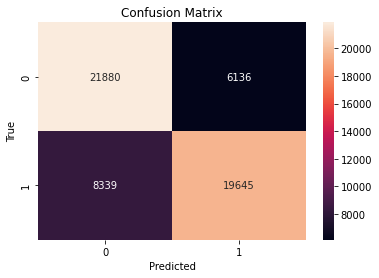

In [66]:
LGBM = LGBMClassifier()
boosting=['dart']
application= ['binary']
learning_rate= [0.05]
min_data_in_leaf=[20]
feature_fraction= [0.7]    
num_leaves=[41]
metric=['binary_loglossfeature_fraction']
drop_rate= [0.15]

parameters=dict(boosting=boosting, application=application,learning_rate=learning_rate,min_data_in_leaf=min_data_in_leaf,
feature_fraction=feature_fraction,num_leaves=num_leaves, metric=metric, drop_rate=drop_rate)

gridsearch = GridSearchCV(LGBM, parameters, cv = 5)
gridsearch.fit(X_train, y_train)
predictions = gridsearch.predict(X_test)

gridsearch.best_params_
y_predLGBM=gridsearch.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('True');

In [67]:
print("Accuracy : ",accuracy_score(y_test, y_predLGBM))
print("Pccuracy : ",precision_score (y_test, y_predLGBM))
print("Recall : ",recall_score(y_test, y_predLGBM))

Accuracy :  0.7415178571428571
Pccuracy :  0.7619952678329002
Recall :  0.7020082904516867


<BarContainer object of 12 artists>

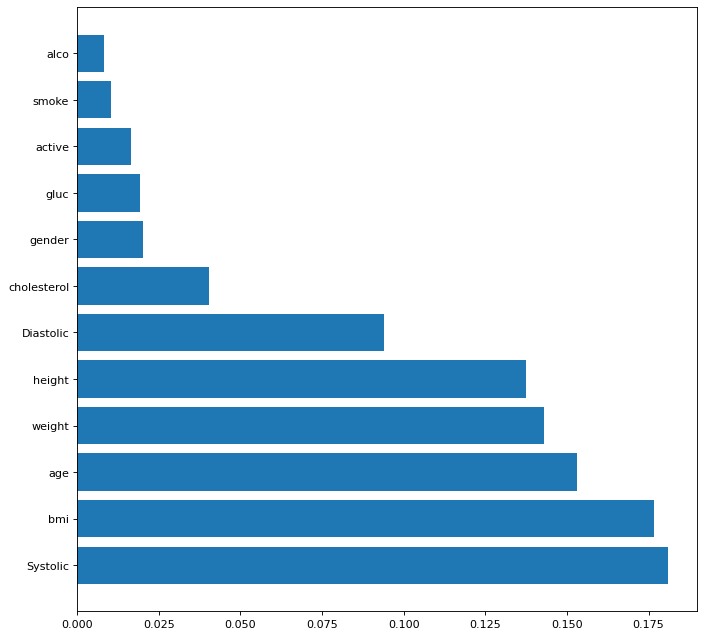

In [113]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()
model = RandomForestClassifier(n_estimators=100, bootstrap = True,max_features = 'sqrt')
model.fit(X_train, y_train)
fi = pd.DataFrame({'feature': list(X_train),'importance': 
model.feature_importances_}).sort_values('importance', ascending = False)
plt.figure(figsize=(10, 10), dpi=80)
plt.barh(fi['feature'],fi['importance'])